In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import country_converter

In [2]:
df = pd.read_csv('clean_movie.csv',index_col= "Unnamed: 0")
df.head()

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
0,Avatar: The Way of Water,7.8,2022,December,PG-13,192.0,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,350000000.0,2.267947e+09,United States
1,Guillermo del Toro's Pinocchio,7.6,2022,December,PG,117.0,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,35000000.0,1.089670e+05,"United States, Mexico, France"
2,Bullet Train,7.3,2022,August,R,127.0,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,85900000.0,2.392686e+08,"Japan, United States"
4,M3gan,6.4,2022,December,PG-13,102.0,Gerard Johnstone,"Jenna Davis, Amie Donald, Allison Williams, Vi...","Horror, Sci-Fi, Thriller",New Zealand,12000000.0,1.712539e+08,United States
6,Amsterdam,6.1,2022,October,R,134.0,David O Russell,"Christian Bale, Margot Robbie, John David Wash...","Comedy, Drama, History",USA,80000000.0,3.124581e+07,"United States, Japan"


In [3]:
df_country = df['Country_of_origin']
df_country = df_country.str.split(', ')
df_temp = df_country.explode('Country_of_origin')

df_country_count = pd.DataFrame(df_temp.value_counts()).reset_index()

df_country_count.columns = ['Country_of_origin','Number of Movie']
df_country_count['Country Code'] = df_country_count['Country_of_origin'].apply(lambda x: country_converter.convert(names=x, to='ISO3', not_found='Unknown'))

In [4]:
map_film = px.choropleth(df_country_count,
                         locations='Country Code',
                         color = 'Number of Movie')
#map_film.update_layout(coloraxis_showscale=True)

map_film.show()

In [5]:
df_country_count.head(20)

,Country_of_origin,Number of Movie,Country Code
0,United States,1529,USA
1,United Kingdom,376,GBR
2,Canada,179,CAN
3,France,157,FRA
4,Germany,156,DEU
5,China,99,CHN
6,Japan,71,JPN
7,Australia,60,AUS
8,Spain,40,ESP
9,Italy,36,ITA


Từ biểu đồ trên, ta có thể thấy:
- Mỹ là nước sản xuất phim nhiều nhất ở trên thế giới, vượt trội hoàn toàn so với những nước khác. Điều này khá là dễ hiểu bởi Mỹ là cường quốc về phim ảnh (nơi có nền công nghiệp điện ảnh lớn nhất và lâu đời nhất). 
- Sau Mỹ thì các quốc gia Châu Âu như Vương quốc Anh, Pháp, Đức, Tây Ban Nha hay Ý cũng có số lượng sản xuất phim khá nhiều. Châu Âu là nơi được coi là cái nôi của nền điện ảnh. Những bộ phim ở Châu Âu thì thường mang tính nghệ thuật nhiều hơn, làm phim cũng không quan tâm nhiều đến doanh thu. Bởi vậy tuy ích hơn Mỹ về số lượng phim nhưng chất lượng phim ở đây vô cùng tốt.
- Ở châu Á thì các quốc gia như Trung Quốc và Nhật Bản sở hữu số lượng phim sản xuất nhiều nhất. Trung Quốc là quốc gia đông dân nhất thế giới nên sở hữu thị trường rất lớn đem về lợi nhuận khủng nên cũng dễ hiểu nếu họ sản xuất nhiều phim. Còn Nhật Bản cũng có một nền công nghiệp phim ảnh lâu đời, cộng với những kịch bản độc đáo, sáng tạo nên thu hút được nhiều người xem -> Sản xuất nhiều phim. 
- Ngoài ra các quốc gia nói tiếng Anh như Canada hay Úc cũng sở hữu ngành công nghiệp phim ảnh lớn với số lượng sản xuất phim cũng khá nhiều. Nguyên nhân có thể là do họ nói tiếng Anh - là ngôn ngữ phổ biến nhất trên thế giới + gần cường quốc về phim như Mỹ hay có văn hoá tương đồng với Mỹ nên được đón nhận nhiều -> Sản xuất phim nhiều

Chúng ta sẽ dùng violin để trực quan về thể loại phim và rating của nó

In [6]:
df_temp = df[['Rating','Genre']]

df_temp['Genre'] = df_temp['Genre'].str.split(', ')
df_temp = df_temp.explode('Genre')


C:\Users\HP\AppData\Local\Temp\ipykernel_7852\724487402.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [7]:
df_temp['Genre'].value_counts()

Drama        770
Action       599
Comedy       556
Adventure    484
Thriller     289
Crime        270
Romance      223
Sci-Fi       200
Horror       199
Fantasy      181
Mystery      177
Biography    116
Animation    102
Family        97
History       46
Music         37
Sport         25
War           16
Musical       14
Western        8
Name: Genre, dtype: int64

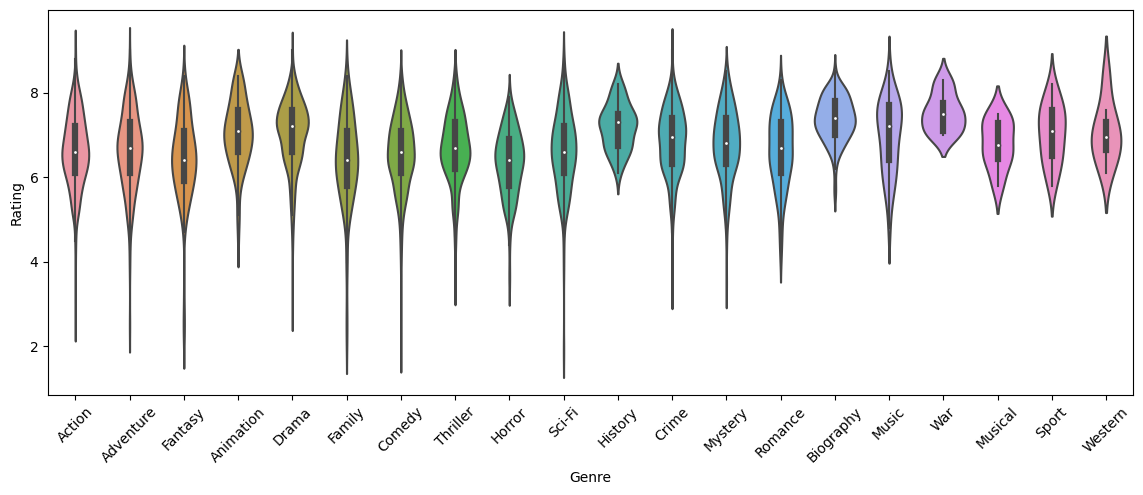

In [8]:
plt.figure(figsize=(14, 5))
sns.violinplot(x="Genre", y="Rating", data=df_temp)
plt.xticks(rotation=45)
plt.show()

- Các thể loại phim có khoảng phân bố ngắn như History, Biography, War, Musical, Sport, Western có điểm số tương đối cao, thường là trên 5 đến hơn 8. Nguyên nhân có thể đến từ việc một số thể loại có rất ít phim như  War, Musical, Sport, Western và những phim này được đánh giá cao. Ngoài ra, còn có thể do đặc thù của những thể loại phim này, đó là những thể loại này thường dựa trên một nội dung đã tồn tại và được yêu thích, không phải lên kịch bản nên mức độ rủi ro không quá cao. Cộng với việc nội dung đã được kiểm chứng nên điểm cao cũng khá dễ hiểu.
- Đối với thể loại phim có mức độ phân bố rộng, đây là những thể loại phim được sản xuất rất nhiều, kịch bản của những thể loại phim này thì thường rất đa dạng, có thể sáng tạo hay dựa trên một sự kiện có sẵn. Bởi vậy có những phim rất hay, cũng có những phim vô cùng dở và không được đánh giá cao.
- Và dù có khác nhau, các thể loại đều có sự phân bố tập trung nhiều nhất ở khoảng điểm từ 6-8. Đây có thể coi là khoảng điểm trung bình khá của các bộ phim

% Genre	

In [9]:
gen_df = df_temp['Genre'].value_counts()
gen_df = gen_df[gen_df>100]
gen_df

Drama        770
Action       599
Comedy       556
Adventure    484
Thriller     289
Crime        270
Romance      223
Sci-Fi       200
Horror       199
Fantasy      181
Mystery      177
Biography    116
Animation    102
Name: Genre, dtype: int64

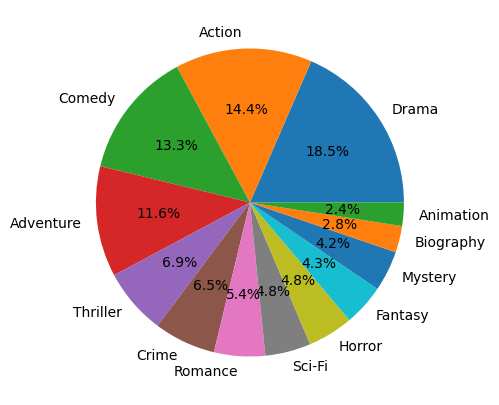

In [10]:
plt.figure(figsize=(14, 5))
plt.pie(gen_df,labels = gen_df.index,autopct='%1.1f%%')
plt.show()

- Các thể loại phim như Action, Drama, Adventure, Comedy chiếu tỷ trọng khá nhiều. Đây là những thể loại phim được nhiều người yêu thích vì tính giải trí của nó rất cao.
- Các thể loại phim như Thriller, Crime, Romance,... chiếm tỷ trọng trung bình. Những thể loại phim này có độ giải trí cũng cao nhưng chỉ phù hợp với một số bộ phận khán giả, không mang tính đại chúng.
- Thể loại phim chiếm tỷ trọng thấp là Biography, nguyên nhân bởi thể loại này mang tính hàn lâm, khá khó xem nên không được sản xuất nhiều. Còn với Animation thì có lẽ do khó làm, cộng với việc thường phục vụ cho nhóm đối tượng là trẻ con (người lớn xem rạp chiếu phim nhiều hơn) nên cũng không được sản xuất nhiều.   

Mối qh điểm và income

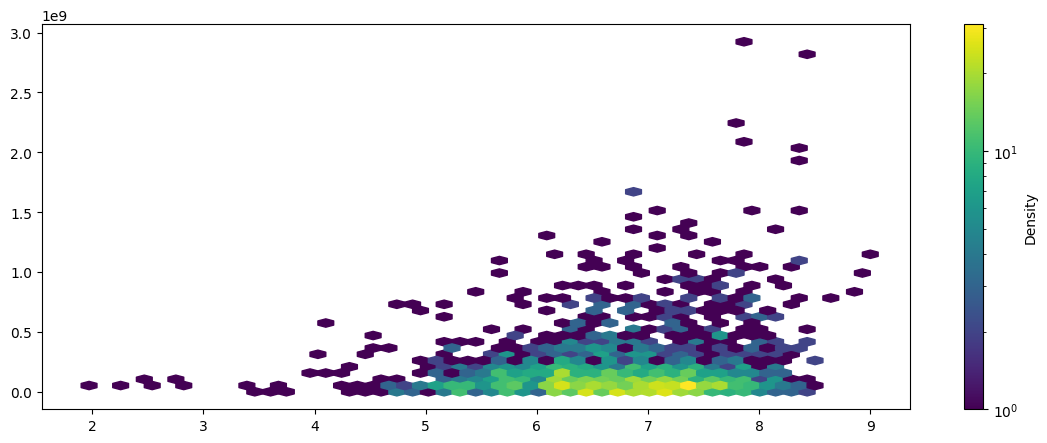

In [11]:
fig,ax = plt.subplots(figsize=(14, 5))

#plt.scatter(X_scaled[:,0],X_scaled[:,1])
hex = ax.hexbin(df['Rating'],df['Income'],gridsize=50,bins='log', cmap='viridis')
fig.colorbar(hex, ax=ax, label='Density')
plt.show()

- Các phim có Rating thấp (dưới 4) thường có doanh thu cũng khá thấp.
- Các phim có Rating nằm ở khoảng trung bình (từ 5 đến 7) có khoảng doanh thu rộng hơn và cao hơn, tuy nhiên, số lượng doanh thu thấp vẫn chiếm phần nhiều.
- Các phim có Rating cao có khoảng doanh thu rộng và cao nhất, ở những khoảng doanh thu cao thì mức điểm này cũng có vẻ nhiều hơn so với các mức trước. Đặc biệt là những phim có doanh thu cao nhất đều nằm ở mức 8 điểm trở lên. Chứng tỏ là những phim có doanh thu cao đều là những phim được đánh giá tốt. Tuy nhiên điều ngược lại có vẻ không đúng khi những phim được đánh giá cao có mức tập chung nhiều ở những vùng doanh thu thấp. Những phim này có thể là phim nghệ thuật, được lòng giới phê bình nhưng lại kén người xem dẫn đén doanh thu thấp.

In [12]:
temp_df = df[['Year', 'Genre', 'Title', 'Income']]

temp_df['Genre'] = temp_df['Genre'].str.split(', ')
temp_df = temp_df.explode('Genre')


C:\Users\HP\AppData\Local\Temp\ipykernel_7852\2971473568.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
burst = px.sunburst(temp_df, 
                    path=['Year', 'Genre', 'Title'], 
                    values='Income',
                    width=1100, 
                    height=1100
                    )

burst.show()

- Từ biểu đồ này, ta có thể thấy sự tỷ trọng doanh thu của các năm khá là đồng đều nhau, riêng chỉ có năm 2020 - năm đại dịch Covid bùng nổ thì doanh thu lại vô cùng thấp. Nguyên nhân khá dễ hiểu khi năm này mọi người phải thực hiện cách ly, hoạt động giải trí như rạp chiếu phim bị đóng cửa.
- Các thể loại phim như Action, Adventure, Comedy, Drama là những thể loại chiếm doanh số cao nhất trong các năm. Đây là những thể loại được sản xuất khá  nhiều và cũng được công chúng yêu thích.
- Những bộ phim có doanh thu cao nhất đều có hai thể loại đó là Adventure và Action, chứng tỏ đây là những thể loại được yêu thích nhất, có thể vì những phân cảnh hành động hoành tráng hay những là cốt truyện về hành trình của phim vô cùng thú vị và hấp dẫn
  

In [21]:
df.sort_values(by = ['Income'],ascending= False).head(10)

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
1300,Avatar,7.8,2009,December,PG-13,162.0,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",USA,237000000.0,2.922918e+09,United States
305,Avengers: Endgame,8.4,2019,April,PG-13,181.0,"Anthony Russo, Joe Russo","Robert Downey Jr , Chris Evans, Mark Ruffalo, ...","Action, Adventure, Drama",UK,356000000.0,2.797501e+09,United States
0,Avatar: The Way of Water,7.8,2022,December,PG-13,192.0,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,350000000.0,2.267947e+09,United States
714,Star Wars: Episode VII - The Force Awakens,7.8,2015,December,PG-13,138.0,J J Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...","Action, Adventure, Sci-Fi",Ireland,245000000.0,2.069522e+09,United States
405,Avengers: Infinity War,8.4,2018,April,PG-13,149.0,"Anthony Russo, Joe Russo","Robert Downey Jr , Chris Hemsworth, Mark Ruffa...","Action, Adventure, Sci-Fi",UK,321000000.0,2.048360e+09,United States
103,Spider-Man: No Way Home,8.3,2021,December,PG-13,148.0,Jon Watts,"Tom Holland, Zendaya, Benedict Cumberbatch, Ja...","Action, Adventure, Fantasy",Iceland,200000000.0,1.917430e+09,United States
723,Jurassic World,6.9,2015,June,PG-13,124.0,Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...","Action, Adventure, Sci-Fi",USA,150000000.0,1.671537e+09,United States
344,The Lion King,6.8,2019,July,PG,118.0,Jon Favreau,"Donald Glover, Beyonc , Seth Rogen, Chiwetel E...","Animation, Adventure, Drama",South Africa,260000000.0,1.663250e+09,"United States, United Kingdom"
1008,The Avengers,8.0,2012,May,PG-13,143.0,Joss Whedon,"Robert Downey Jr , Chris Evans, Scarlett Johan...","Action, Adventure, Sci-Fi",USA,220000000.0,1.518816e+09,United States
753,Furious 7,7.1,2015,April,PG-13,137.0,James Wan,"Vin Diesel, Paul Walker, Dwayne Johnson, Jason...","Action, Crime, Thriller",United Arab Emirates,190000000.0,1.515341e+09,"United States, China, Japan, Canada, United Ar..."


In [14]:
df.dtypes

Title                 object
Rating               float64
Year                   int64
Month                 object
Certificate           object
Runtime              float64
Directors             object
Stars                 object
Genre                 object
Filming_location      object
Budget               float64
Income               float64
Country_of_origin     object
dtype: object

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
X = df['Budget'].values
X

array([3.50e+08, 3.50e+07, 8.59e+07, ..., 9.50e+07, 4.00e+07, 5.00e+05])

In [17]:
model = LinearRegression()
model.fit(X.reshape(-1,1), df['Income'].values)

y = model.predict(X.reshape(-1,1))

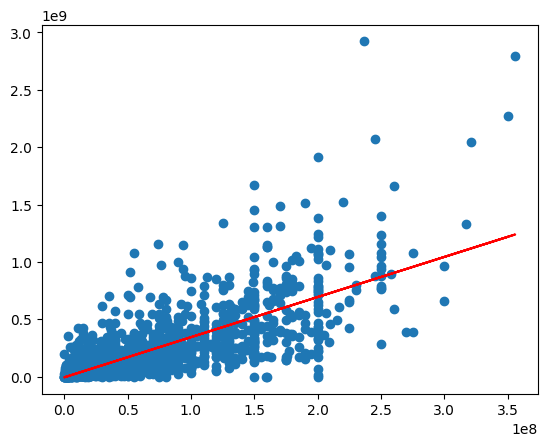

In [18]:
plt.scatter(df['Budget'],df['Income'])
plt.plot(X,y,color = 'red')
plt.show()

- Nhìn chung, ta có thể nhìn thấy một mối tương quan nhẹ giữa biến Budget và Income. 
- Có thể nói rằng ở những bộ phim có doanh thu cao, sự đầu tư của phim cũng là rất nhiều. Khi đầu tư nhiều vào bộ phim như chi tiền mời diễn viên nổi tiếng, quay những phân cảnh khó đòi hỏi chi phí cao, chi phí Marketing,.. thì bộ phim có khả năng mang về doanh thu cao hơn. 
- Tuy nhiên, cũng rất khó khẳng định rằng nếu ta đầu tư nhiêu thì sẽ mang lại doanh thu tốt, bằng chứng là có những bộ phim được đầu tư rất nhiều nhưng doanh thu lại thấp hơn so với kỳ vọng. Nguyên nhân có thể đến về việc chưa hiểu rõ nhu cầu thị trường, Marketing sai cách, Drama từ đoàn làm phim hoặc diễn viên, đầu tư nhiều vào phân cảnh tuy nhiên nội dung lại không hấp dẫn người xem,...